## Fotoğraflardaki el yazısı rakamları otomatik tanıma ve anlamlandırma

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [20]:
mnist = fetch_openml("mnist_784")

C:\Users\hilal\anaconda3\envs\Hilal\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [21]:
mnist.data.shape

(70000, 784)

### Fotoğrafları görme

In [22]:
def show_image(dframe, index):
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image, cmap = "binary")
    plt.axis("off")
    plt.show()

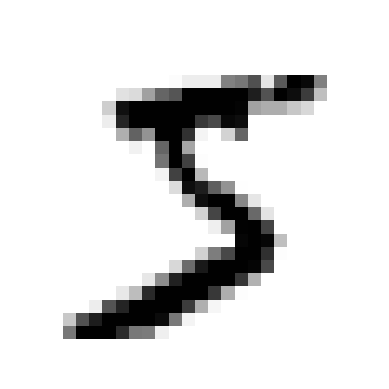

In [23]:
show_image(mnist.data,0)

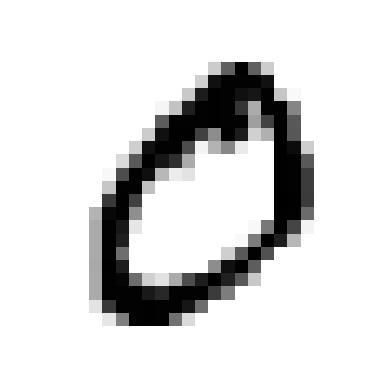

In [24]:
show_image(mnist.data,1)

In [25]:
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist.data, mnist.target, test_size = 1/7.0, random_state =0)

In [26]:
type(train_img) # Dataframe

pandas.core.frame.DataFrame

In [27]:
test_img_copy = test_img.copy()

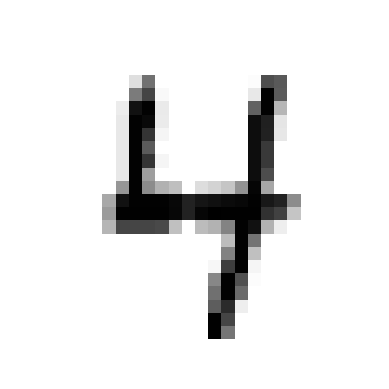

In [28]:
show_image(test_img_copy,1)

### Verilerimizi scale ediyoruz

In [29]:
scaler = StandardScaler()
scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

### PCA işlemi uyguluyoruz

In [30]:
pca = PCA(.95)

In [31]:
pca.fit(train_img)

PCA(n_components=0.95)

In [32]:
pca.n_components_

327

In [33]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [34]:
lr = LogisticRegression(solver = "lbfgs", max_iter = 10000)

In [35]:
lr.fit(train_img, train_lbl)

LogisticRegression(max_iter=10000)

### Makine öğrenmesi ile el yazısını tanıma işlemi

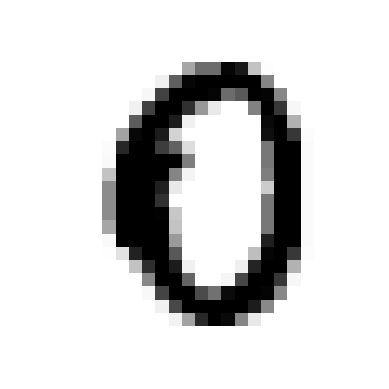

In [37]:
show_image(test_img_copy, 0)

In [38]:
lr.predict(test_img[0].reshape(1,-1)) # 0 sonucunu vererek el yazısını tanıdı

array(['0'], dtype=object)

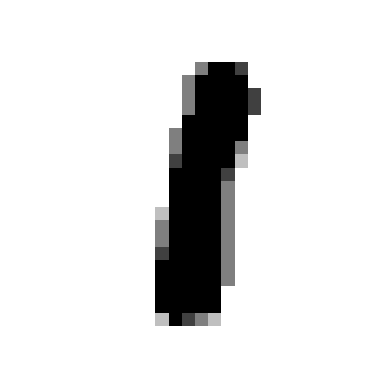

In [44]:
show_image(test_img_copy, 7)

In [45]:
lr.predict(test_img[7].reshape(1,-1)) # 1 sonucunu vererek el yazısını tanıdı

array(['1'], dtype=object)

### Modelimizin doğruluk oranını (accuracy) ölçüyoruz

In [46]:
lr.score(test_img, test_lbl)

0.9183